In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import math

In [2]:
data = pd.read_csv('../1.data-preparation/new-data/data_Y1.csv')
data.describe()

,MemberID,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
count,7.603700e+04,76037.000000,76037.000000,76037.0,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,...,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000
mean,4.994795e+07,0.052225,0.467102,1.0,0.085866,0.090824,0.059405,0.096098,0.132935,0.112366,...,2.175033,0.968765,1.511600,3.703697,3.758749,2.178216,2.885066,1.580296,0.299999,0.344569
std,2.890149e+07,0.222481,1.612204,0.0,0.280168,0.287361,0.236383,0.294727,0.339507,0.315819,...,2.243436,1.046544,1.536634,4.089940,3.434990,2.533432,2.696510,1.814171,0.458260,0.475231
min,2.100000e+02,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.483922e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.990758e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.200000,2.000000,3.000000,1.000000,2.600000,1.000000,0.000000,0.000000
75%,7.510115e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.285714,7.000000,6.000000,3.000000,4.800000,2.000000,1.000000,1.000000
max,9.999863e+07,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000,1.000000,1.000000


In [21]:
# data.loc[data['TARGET'] > 0, 'TARGET'] = 1
# data['TARGET'].describe()

count    76037.000000
mean         0.154780
std          0.361697
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TARGET, dtype: float64

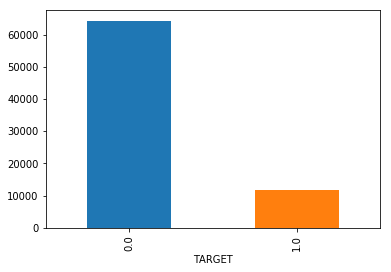

In [22]:
# data.groupby(['TARGET']).size().plot.bar()

In [3]:
data.drop("MemberID", axis = 1, inplace = True)
data.drop("Year", axis = 1, inplace = True)

y = data['TARGET']
X = data.loc[:, data.columns != 'TARGET']
X.head()

,ClaimsTruncated,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0.00000,0,10,10,10.000000,1,0,1
1,0,1,0,0,0,0,0,0,0,1,...,5,2,3.90909,11,6,1,2.750000,4,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0.00000,0,6,6,6.000000,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,4,1,2.00000,6,6,1,3.333333,3,0,0
4,0,1,0,0,0,0,0,0,0,1,...,2,2,2.00000,1,5,2,2.750000,4,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    pred_y = pred_y.round(0).astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    print ("R2 value: %.4f" % r2)
#     from sklearn.metrics import f1_score
#     f1= f1_score(y_test, pred_y)
#     print ("F1 score: %.4f" % f1)

In [7]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = np.array(class_weights).tolist()
d = {}

for idx,item in enumerate(class_weights):
    d[idx] = item
d


{0: 0.07405856226902355,
 1: 0.9781130549838283,
 2: 1.996736194477791,
 3: 3.3100124378109452,
 4: 4.731952347083926,
 5: 8.295667082294264,
 6: 12.366403345724907,
 7: 18.177937158469945,
 8: 26.827116935483872,
 9: 31.68154761904762,
 10: 40.56783536585366,
 11: 60.48295454545455,
 12: 56.38241525423729,
 13: 79.20386904761905,
 14: 123.20601851851852,
 15: 17.98141891891892}

In [ ]:
model = linear_model.LogisticRegression(n_jobs=-1, verbose=1)

param_grid = {
                 'C': [1.0, 0.75],
                'penalty':['l1','l2'],
                 'solver': ['saga', 'liblinear']
             }

from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(model, param_grid, cv=3)

grid_clf.fit(X_train, y_train)
eval(grid_clf, X_test, y_test)

C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


max_iter reached after 22 seconds
max_iter reached after 22 seconds


C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 22 seconds
max_iter reached after 23 seconds
max_iter reached after 22 seconds
max_iter reached after 22 seconds
max_iter reached after 21 seconds
max_iter reached after 20 seconds
max_iter reached after 20 seconds
max_iter reached after 21 seconds
max_iter reached after 24 seconds
max_iter reached after 24 seconds
max_iter reached after 24 seconds
max_iter reached after 24 seconds


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.5min finished


max_iter reached after 20 seconds


C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 22 seconds
max_iter reached after 21 seconds
max_iter reached after 22 seconds
max_iter reached after 22 seconds
max_iter reached after 22 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 24 seconds
max_iter reached after 23 seconds


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.5min finished


max_iter reached after 21 seconds


C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 22 seconds
max_iter reached after 20 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 21 seconds
max_iter reached after 23 seconds
max_iter reached after 22 seconds
max_iter reached after 22 seconds
max_iter reached after 24 seconds
[LibLinear]

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.5min finished
C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [12]:
grid_clf.best_params_, grid_clf.best_estimator_

({'C': 0.75, 'penalty': 'l1', 'solver': 'saga'},
 LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
           penalty='l1', random_state=None, solver='saga', tol=0.0001,
           verbose=1, warm_start=False))

In [23]:
data_submit = pd.read_csv('../1.data-preparation/new-data/data_Y2.csv')
data_submit.describe()

,MemberID,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
count,7.143500e+04,71435.000000,71435.000000,71435.0,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,...,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000
mean,4.993986e+07,0.056611,0.437895,1.0,0.088108,0.085364,0.057213,0.096563,0.136474,0.116232,...,2.207475,0.948695,1.516412,3.864030,3.879919,2.180024,2.937653,1.713670,0.282313,0.353090
std,2.894077e+07,0.231099,1.531780,0.0,0.283454,0.279425,0.232251,0.295364,0.343293,0.320505,...,2.281410,1.040350,1.559578,4.210155,3.421071,2.471471,2.640371,1.975234,0.450128,0.477934
min,4.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.477813e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.995379e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.222222,2.000000,4.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,7.521986e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.333333,8.000000,7.000000,3.000000,4.800000,2.000000,1.000000,1.000000
max,9.999882e+07,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000,1.000000,1.000000


In [24]:
data_submit.drop("MemberID", axis = 1, inplace = True)
data_submit.drop("Year", axis = 1, inplace = True)

y_submit = data_submit['TARGET']
X_submit = data_submit.loc[:, data_submit.columns != 'TARGET']
y_submit.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: TARGET, dtype: float64

In [25]:
X_submit = scaler.transform(X_submit)

1st time: 0.5075

2nd time: 0.5079

3rd time: 0.5065

4nd time: 0.4940

In [43]:
eval(model, X_submit, y_submit)

RMSLE: 0.5073
R2 value: -9.1861


In [45]:
pred_y = model.predict(X_submit)
pred_y.max()

1.0

In [46]:
data = pd.read_csv('../1.data-preparation/new-data/data_Y2.csv')
pred_y = model.predict(X_submit)

submission = pd.DataFrame()
submission['MemberID'] = data['MemberID']
submission['DIH'] = pred_y.astype(int)
submission.head()
submission.to_csv('./logistic-regression.csv')

In [47]:
submission['DIH'].describe()

count    71435.000000
mean         0.336278
std          0.472439
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: DIH, dtype: float64

In [48]:
submission.groupby(['DIH']).size()

DIH
0    47413
1    24022
dtype: int64